In [53]:
%matplotlib inline
import pandas, numpy, ggplot

In [54]:
names = pandas.read_table('data/term.txt', names = ['lg','spkr','chip','name'], encoding='utf-8')
foci = pandas.read_table('data/foci-exp.txt', names = ['lg','spkr','term_number','name','focus'], encoding='utf-8')
# NB: multiple foci for each (lg, spkr, color name)

In [55]:
chip_coordinates = pandas.read_table('cnum-vhcm-lab-new.txt', encoding='utf-8').iloc[:,0:3]
chip_coordinates.columns =['num','v','h']
chip_coordinates['code'] = chip_coordinates['v'].astype('str') + chip_coordinates['h'].astype('str')

# make dictionaries to convert from code to number and back
code_to_number = dict(zip(chip_coordinates['code'], chip_coordinates['num']))
number_to_code = dict(zip(chip_coordinates['num'], chip_coordinates['code']))

# test using the values from the starter code 
if code_to_number['B23']!= 221:
    raise ValueError('B23 should corresond to chip number 221')

In [56]:
# get the set of codes corresponding from focal green to focal blue
gb_span_code = ['F'+str(i) for i in range(17,28)]  # codes for chips spanning from focal green to focal blue
gb_span_num = [code_to_number[c] for c in gb_span_code]

# Replicate Figure 2 from Lindsey and Brown, 2004 

### Find all speakers with a "grue" term

In [57]:
#find the subset of items correpsonding to the span, so that we don't have to operate on all data 
labelsUsedInGrueRange = names[names['chip'].isin(gb_span_num)]

def all_same(items):
    return all(x == items.values[0] for x in items.values)

# apply 'all_same' function to the set of color names in the grue range for each speaker in each language
all_same_for_grue = labelsUsedInGrueRange.groupby(['lg','spkr'])['name'].agg(all_same)
grueSpeakers = pandas.DataFrame(all_same_for_grue[all_same_for_grue].index.tolist(), columns=['lg','spkr'])

#make a new table with the color term used by each grue speaker
gs = grueSpeakers.merge(labelsUsedInGrueRange, on=['lg', 'spkr'])
gs = gs[gs['chip'] == 77]
gs = gs.drop('chip', 1)

In [58]:
# get the proportion of speakers with a grue term
numGrueSpeakers = float(len(numpy.unique(grueSpeakers['lg'].map(str)+grueSpeakers['spkr'].map(str))))
numAllSpeakers = len(numpy.unique(names['lg'].map(str)+names['spkr'].map(str))) 
print('Proportion Speakers With A Grue Term: '+ str(numGrueSpeakers / numAllSpeakers))

Proportion Speakers With A Grue Term: 0.358901897457


### Find distribution over foci among speakers with a "grue" term 

In [59]:
gs_with_focus = gs.merge(foci)
gs_with_focus['column'] = [x[1:] for x in gs_with_focus['focus']]
gs_with_focus['column']=  gs_with_focus['column'].astype('int') 

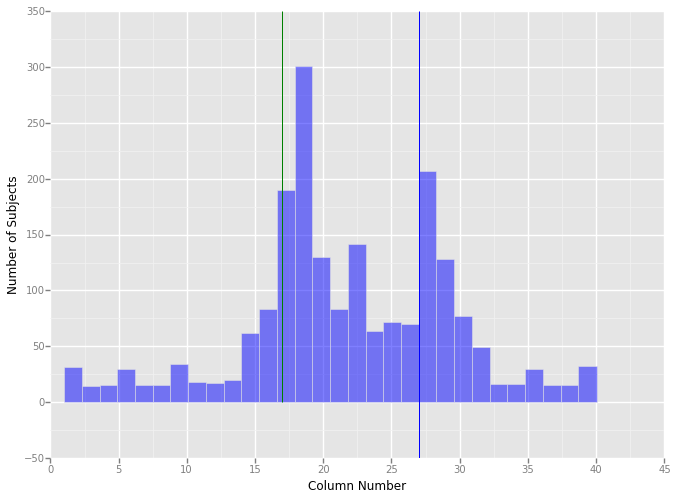

<ggplot: (8739105091869)>

In [60]:
ggplot.ggplot(gs_with_focus[gs_with_focus['column'] != 0], ggplot.aes(x='column')) + \
ggplot.geom_histogram(fill='blue', alpha=.5) + ggplot.xlab('Column Number') + ggplot.ylab('Number of Subjects') + \
ggplot.geom_vline(xintercept = 17, colour='green') + ggplot.geom_vline(xintercept = 27, colour='blue')

# Extension: Are There Unimodal Grue Speakers?

Open question: Is there in fact a reasonably-sized subset of grue speakers who drop their grue foci only in the in-between saddle region, in a pattern consistent with a bump centered in that region?  Recall that:
focal green = F17 focal blue = F27
The middle of that range is hue column 22.  Find (a) what proportion of grue speakers place their grue foci only within say 3 columns on either side of that, i.e. in columns 19 through 25, and (b) the shape of the distribution of grue focus hits for that subset of speakers.  Feel free to adjust search as needed to uncover relevant and/or interesting material.

### a) grue speakers with foci only within 19-25

In [61]:
gs_with_focus
limited_range = range(19,26)

def in_set(items, set):
    return all(x in set for x in items.values)

gs_grue_center_temp = pandas.DataFrame(gs_with_focus.groupby(['lg','spkr'])['column'].agg(lambda x: in_set(x, limited_range)))
unimodel_grue_speakers = pandas.DataFrame(gs_grue_center_temp[gs_grue_center_temp['column']].index.tolist(), columns=['lg','spkr'])

print('proportion of unimodal grue speakers: '+ str(len(unimodel_grue_speakers) / numGrueSpeakers))

proportion of unimodal grue speakers: 0.213723284589


### b) distribution of foci for unimodal grue speakers

In [62]:
ugs_with_focus = unimodel_grue_speakers.merge(gs_with_focus[['lg','spkr','name']]).merge(foci)
ugs_with_focus['column'] = [x[1:] for x in ugs_with_focus['focus']]
ugs_with_focus['column']=  ugs_with_focus['column'].astype('int') 

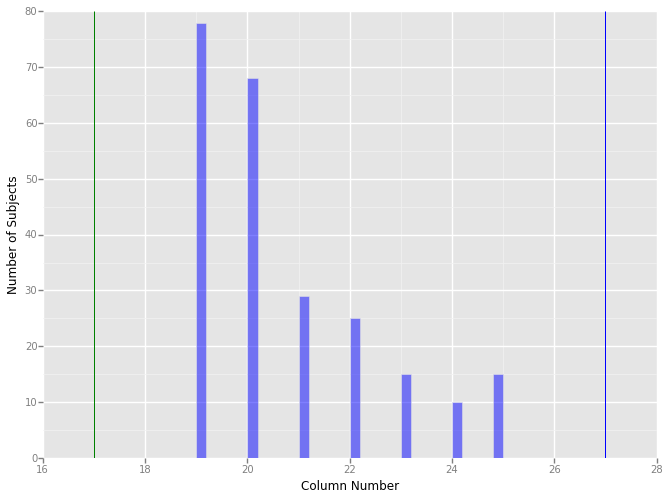

<ggplot: (8739104969149)>

In [63]:
ggplot.ggplot(ugs_with_focus[ugs_with_focus['column'] != 0], ggplot.aes(x='column')) + \
ggplot.geom_histogram(fill='blue', alpha=.5) + ggplot.xlab('Column Number') + ggplot.ylab('Number of Subjects') + \
ggplot.geom_vline(xintercept = 17, colour='green') + ggplot.geom_vline(xintercept = 27, colour='blue')